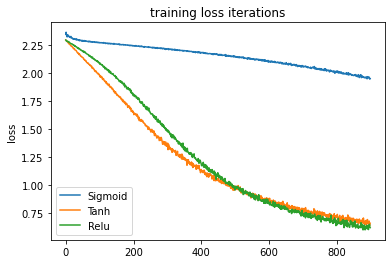

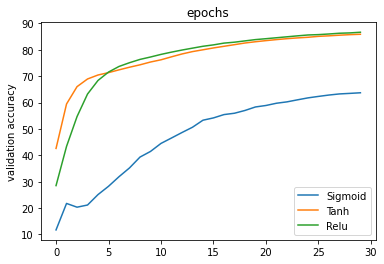

In [17]:
import torch
from torch import nn,optim
from torch.utils.data import DataLoader
import torchvision.datasets as dsets 
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F


class Net(nn.Module):
  def __init__(self,in_,neurons,out_):
    super(Net,self).__init__()
    self.linear1=nn.Linear(in_,neurons)
    self.linear2=nn.Linear(neurons,out_)

  def forward(self,x):
    x = torch.sigmoid(self.linear1(x))
    x = self.linear2(x)
    return x


class NetTanh(nn.Module):
  def __init__(self,in_,neurons,out_):
    super(NetTanh,self).__init__()
    self.linear1 = nn.Linear(in_,neurons)
    self.linear2 = nn.Linear(neurons,out_)

  def forward(self,x):
    x = torch.tanh(self.linear1(x))
    x = self.linear2(x)
    return x


class NetRelu(nn.Module):
  def __init__(self,in_,neurons,out_):
    super(NetRelu,self).__init__()
    self.linear1 = nn.Linear(in_,neurons)
    self.linear2 = nn.Linear(neurons,out_)

  def forward(self,x):
    x = torch.relu(self.linear1(x))
    x = self.linear2(x)
    return x

size = 28*28

def train(model, criterion, train_loader, validation_loader, optimizer, epochs = 100):
  useful_stuff = {'training_loss':[], 'validation_accuracy':[]}  
  for epoch in range(epochs):
    for x,y in train_loader:
      z = model(x.view(-1,size))
      loss = criterion(z,y)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      useful_stuff['training_loss'].append(loss.item())

    correct=0

    for x,y in validation_loader:
      z = model(x.view(-1,size))
      _,yhat = z.max(1)
      correct+= (yhat==y).sum().item()
    accuracy = 100 * (correct/len(validation_dataset))
    useful_stuff['validation_accuracy'].append(accuracy)
  
  return useful_stuff

train_dataset = dsets.MNIST(root='/.data',train=True,transform=transforms.ToTensor(),download=True)
validation_dataset = dsets.MNIST(root='./data',train=False,transform=transforms.ToTensor(),download=True)

criterion = nn.CrossEntropyLoss()
input_ = size
neurons = 100
output_ = 10
train_loader = DataLoader(dataset=train_dataset,batch_size=2000,shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset,batch_size=5000,shuffle=False)

model = Net(input_,neurons,output_)
optimizer = optim.SGD(model.parameters(),lr=0.01)
training_results = train(model,criterion,train_loader,validation_loader,optimizer,30)

model_Tanh = NetTanh(input_,neurons,output_)
optimizer = optim.SGD(model_Tanh.parameters(),lr=0.01)
training_Tanh_results = train(model_Tanh,criterion,train_loader,validation_loader,optimizer,30)

model_Relu = NetRelu(input_,neurons,output_)
optimizer = optim.SGD(model_Relu.parameters(),lr=0.01)
training_Relu_results = train(model_Relu,criterion,train_loader,validation_loader,optimizer,30)

plt.plot(training_results['training_loss'],label="Sigmoid")
plt.plot(training_Tanh_results['training_loss'],label="Tanh")
plt.plot(training_Relu_results['training_loss'],label="Relu")
plt.ylabel('loss')
plt.title('training loss iterations')
plt.legend()
plt.show()



plt.plot(training_results['validation_accuracy'],label="Sigmoid")
plt.plot(training_Tanh_results['validation_accuracy'],label="Tanh")
plt.plot(training_Relu_results['validation_accuracy'],label="Relu")
plt.ylabel('validation accuracy')
plt.title('epochs')
plt.legend()
plt.show()